In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import os
import rootpath

In [2]:
def get_cpd_df(file, aspect):
    """
    Get the dataframe for change point detection algorithm.
    :param file: file from "cpd_aspects"
    :param aspect: aspect from topics.
    :return: dataframe.
    """
    df = pd.read_csv(file)
    df.drop_duplicates(['sentence'], keep='first', inplace=True)  # drop duplicates based on sentence
    df = df.sort_values('date')

    df_new = df[df[aspect] == True]
    # df_new = df_new[df_new["renovation"] == True]

    print('length of df :', len(df))
    print('length of df_new', len(df_new))
    cpd_df = df_new.groupby(['date', 'uid'])['sentiment'].mean().reset_index()
    cpd_df = cpd_df.groupby('date')['sentiment'].mean().reset_index()

    print(cpd_df.head(3))

    # print("lenght of cpd_df:", len(cpd_df))
    return cpd_df, df_new

In [4]:
root_dir = rootpath.detect()

test_file = 'data/cpd_aspects/164#41af2a52-407d-4c39-863f-57c6b3791920'
testpath = os.path.join(root_dir, test_file)
print(testpath)

/home/yiyi/Documents/masterarbeit/CPD/data/cpd_aspects/164#41af2a52-407d-4c39-863f-57c6b3791920


In [10]:
cpd_df , _ = get_cpd_df(testpath, "room")

length of df : 29132
length of df_new 3247
         date  sentiment
0  2015-01-01   0.489041
1  2015-01-02   0.401239
2  2015-01-03  -0.073607


In [14]:
sentiments = np.exp(cpd_df.sentiment)

In [17]:
sentiments

0       1.630752
1       1.493674
2       0.929037
3       1.001594
4       1.342694
          ...   
1168    1.646207
1169    0.974067
1170    1.647564
1171    0.613216
1172    0.808155
Name: sentiment, Length: 1173, dtype: float64

In [21]:
sentiments = cpd_df.sentiment.ewm(span=50, adjust=False).mean()*100

In [22]:
sentiments

0       48.904139
1       48.559815
2       46.366853
3       44.554792
4       43.963147
          ...    
1168    -3.300917
1169    -3.274511
1170    -1.188067
1171    -3.059270
1172    -3.774597
Name: sentiment, Length: 1173, dtype: float64

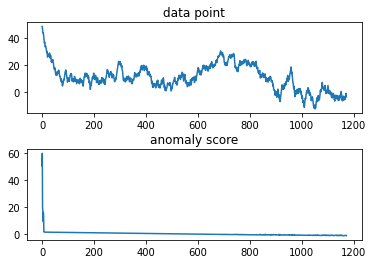

In [26]:
from change_finder import ChangeFinder, SDAR

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)
points = np.concatenate([
    np.random.normal(1, 0.1, 100),
    np.random.normal(-1, 0.1, 100),
])
ax1.plot(sentiments)
ax1.set_title("data point")

cf = ChangeFinder()
scores = [cf.update(p) for p in sentiments]
ax2.plot(scores)
ax2.set_title("anomaly score")
plt.show()

In [ ]:
scores